<a href="https://colab.research.google.com/github/KiranAI887/Sales-Forecasting./blob/main/Project18_Sales_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Cleaning the data

In [ ]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.isnull().sum()

,0
Month,1
Sales,2


In [ ]:
df.isnull()

,Month,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
102,False,False
103,False,False
104,False,False
105,True,True


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [ ]:
#converting month into Datetime

In [ ]:
df['Month']= pd.to_datetime(df['Month'])

In [ ]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [ ]:
df.set_index('Month', inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
# Visualize the Data

<Axes: xlabel='Month'>

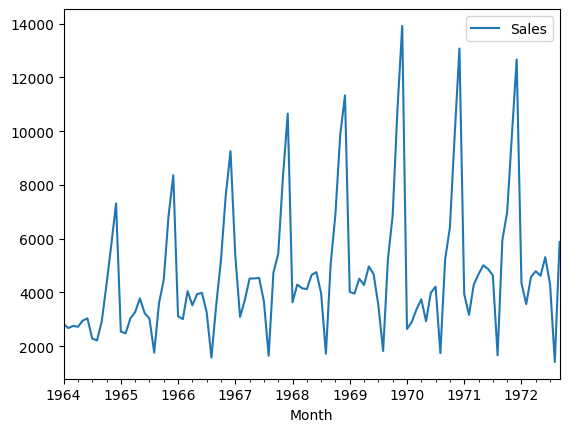

In [ ]:
df.plot()

In [ ]:
# Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Sales'])

In [ ]:
def adfuller_test(Sales):
  result=adfuller(Sales)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observation Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(HO), reject the null hypothesis. Data has Stationry")
  else:
    print("weak evidence against null hypothesis, time series has unit root, indicating it is non stationary")

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observation Used : 93
weak evidence against null hypothesis, time series has unit root, indicating it is non stationary


In [ ]:
# Differencing

In [ ]:
df['Sales First Difference'] = df['Sales']-df['Sales'].shift(1)

In [ ]:
df['Sales seasonal Difference'] = df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head()


,Sales,Sales First Difference,Sales seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [ ]:
## Again test dicky fuller test
adfuller_test(df['Sales seasonal Difference'].dropna())

ADF Test Statistics : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observation Used : 92
strong evidence against the null hypothesis(HO), reject the null hypothesis. Data has Stationry


<Axes: xlabel='Month'>

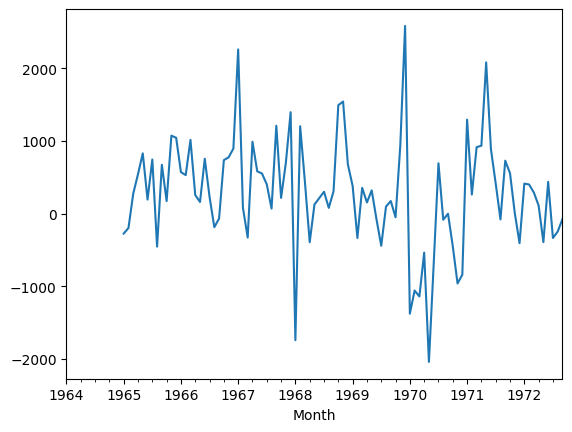

In [ ]:
df['Sales seasonal Difference'].plot()

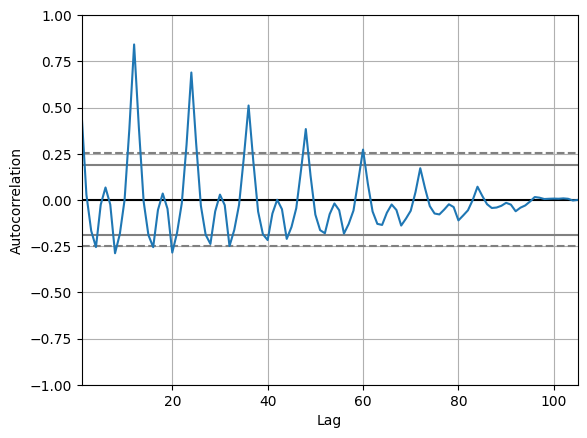

In [ ]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

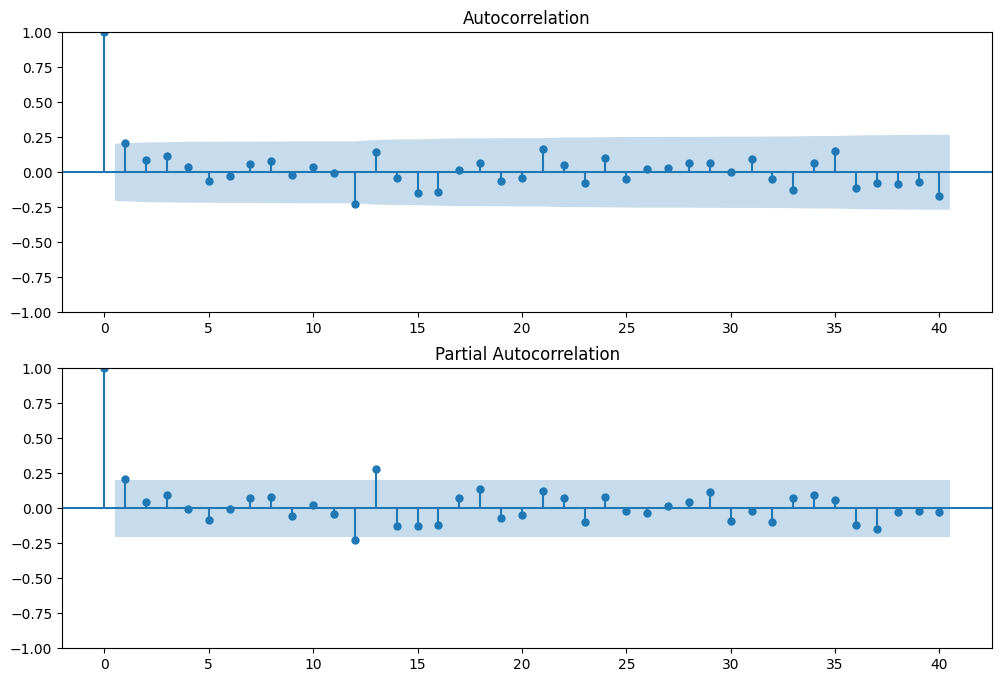

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales seasonal Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
#for non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize4=(12,8))